# Clustering Project

## 1. Data Prep

In [306]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
clients = pd.read_csv("/Users/huzaifamalik/Downloads/Python for Data Science/Unsupervised Learning/Data/wholesale_clients.csv")

In [3]:
clients.shape

(440, 8)

In [4]:
clients.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## 2. Check for any Data Quality Issues

In [6]:
#Check for duplicates
clients.loc[clients.duplicated()]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


In [7]:
#Check for any missing values
clients.loc[clients.isna().any(axis = 1)]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


In [10]:
#Sanity check for Min and Max values in each column
for col in clients.columns:
    print(col, clients[col].min())
    print(col, clients[col].max())
    #print("\n")

Channel 1
Channel 2
Region 1
Region 3
Fresh 3
Fresh 112151
Milk 55
Milk 73498
Grocery 3
Grocery 92780
Frozen 25
Frozen 60869
Detergents_Paper 3
Detergents_Paper 40827
Delicassen 3
Delicassen 47943


## 3. Standardize the Data

In [15]:
# Remove the Channel and Region columns since they are not fields we want to model on

data = clients.drop(columns = ["Channel", "Region"])
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [19]:
#Standardize/Scale the Data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
scaled_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


## 4a. K-Means Clustering with Inertia Values

In [248]:
from sklearn.cluster import KMeans

inertia_values = []

for k in range(2,16):
    #kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)
    
inertia_series = pd.Series(inertia_values, index = range(2,16))

In [249]:
inertia_series

2     1954.183565
3     1619.952782
4     1325.979474
5     1060.998974
6      919.340221
7      823.055682
8      766.977736
9      659.198287
10     611.272834
11     562.573945
12     515.451987
13     491.439729
14     465.139241
15     431.641898
dtype: float64

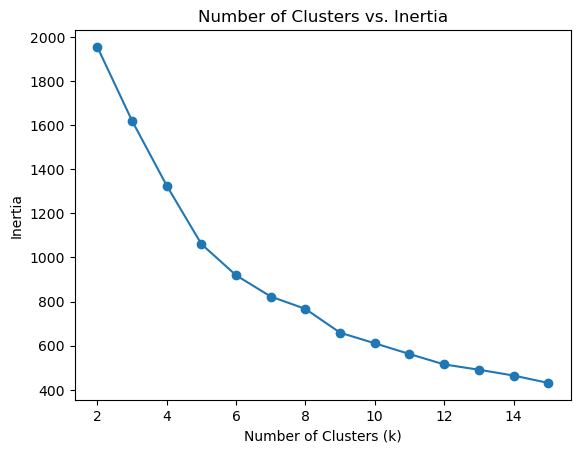

In [250]:
#Plot the inertia values

inertia_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia");

In [251]:
# "Elbow" seems to be at 5 clusters
kmeans5 = KMeans(n_clusters=5, n_init="auto", random_state=42)
kmeans5.fit(scaled_data)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [252]:
cluster_centers5 = pd.DataFrame(kmeans5.cluster_centers_, columns = data.columns)

cluster_centers5

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-0.513819,0.645602,0.898265,-0.340638,0.906661,0.047542
1,1.756386,-0.128282,-0.219258,0.854505,-0.404341,0.343259
2,0.388729,3.943049,4.021646,0.035784,4.226116,0.941636
3,-0.228613,-0.384003,-0.439045,-0.135764,-0.399918,-0.195230
4,1.803356,3.332987,0.942519,9.409801,-0.446409,8.964157


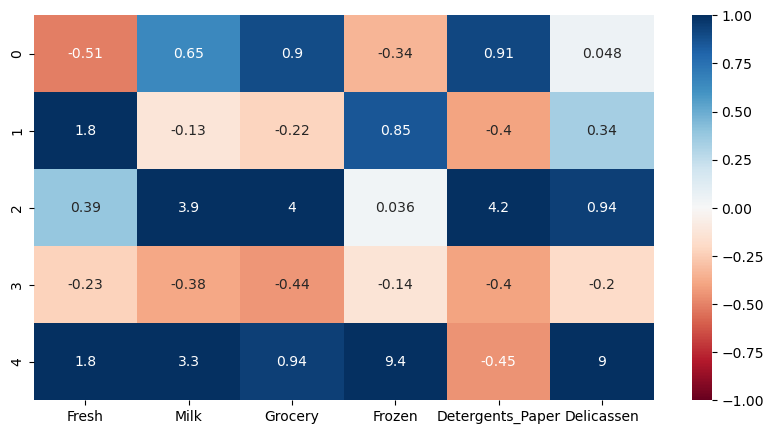

In [253]:
#Visualize cluster centers of 5 clusters with a heatmap

plt.figure(figsize=(10, 5))
sns.heatmap(cluster_centers5, vmin=-1, vmax=1, annot=True, cmap = "RdBu");

Name the Clusters:

* Cluster 0: **Neighborhood retail-oriented buyers**
* Cluster 1: **Food-service-oriented buyers**
* Cluster 2: **High-volume buyers**
* Cluster 3: **Low-volume buyers**
* Cluster 4: **Premium food-service buyers**

In [328]:
pd.Series(kmeans5.labels_).value_counts()

3    272
0     96
1     59
2     11
4      2
Name: count, dtype: int64

## 4b. K-Means Clustering with Silhouette Scores

In [257]:
#Create a silhouette scores plot instead of an inertia plot

from sklearn.metrics import silhouette_score

#create an empty list to hold many silhouette score values
silhouette_scores = []

for k in range(2,16):
    
    kmeans = KMeans(n_clusters=k, n_init=100)
    kmeans.fit(scaled_data)
    
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_, metric="euclidean", sample_size=None))

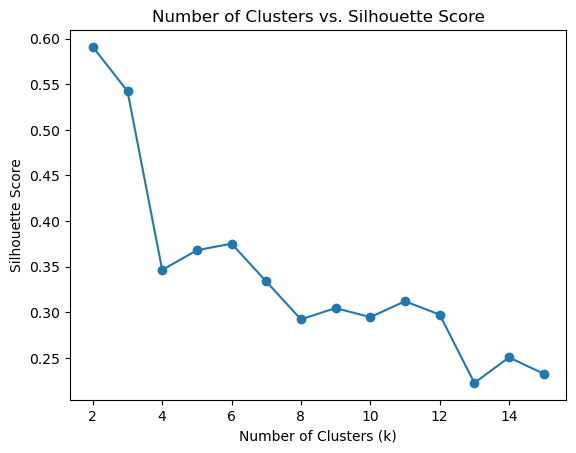

In [258]:
#Plot the Silhouette Scores

ss_series = pd.Series(silhouette_scores, index = range(2,16))
ss_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Number of Clusters vs. Silhouette Score");

In [259]:
#Use 2 clusters
kmeans2 = KMeans(n_clusters=2, n_init="auto", random_state=42)
kmeans2.fit(scaled_data)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [260]:
cluster_centers2 = pd.DataFrame(kmeans2.cluster_centers_, columns = data.columns)

cluster_centers2

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-0.293677,-0.019569,0.023329,-0.213884,0.060592,-0.125300
1,1.634949,0.108942,-0.129874,1.190725,-0.337326,0.697563


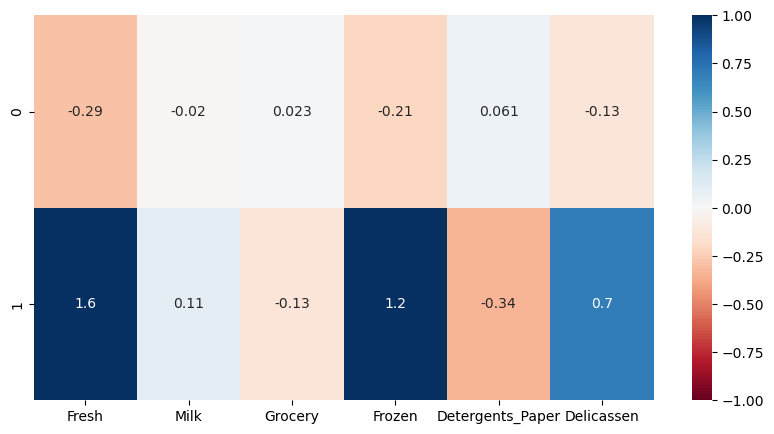

In [261]:
#Visualize cluster centers of 2 clusters with a heatmap

plt.figure(figsize=(10, 5))
sns.heatmap(cluster_centers2, vmin=-1, vmax=1, annot=True, cmap = "RdBu");

Name the Clusters

* Cluster 0: **Typical, low-to-moderate purchasing buyers**
* Cluster 1: **Food-service-oriented buyers**

In [271]:
pd.Series(kmeans2.labels_).value_counts()

0    373
1     67
Name: count, dtype: int64

In [267]:
#Use 3 clusters
kmeans3 = KMeans(n_clusters=3, n_init="auto", random_state=42)
kmeans3.fit(scaled_data)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [268]:
cluster_centers3 = pd.DataFrame(kmeans3.cluster_centers_, columns = data.columns)

cluster_centers3

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-0.242604,-0.212661,-0.221572,-0.186569,-0.203234,-0.150077
1,1.784209,0.008694,-0.192645,1.396080,-0.398960,0.759479
2,-0.260860,1.999209,2.371905,-0.234950,2.493966,0.331741


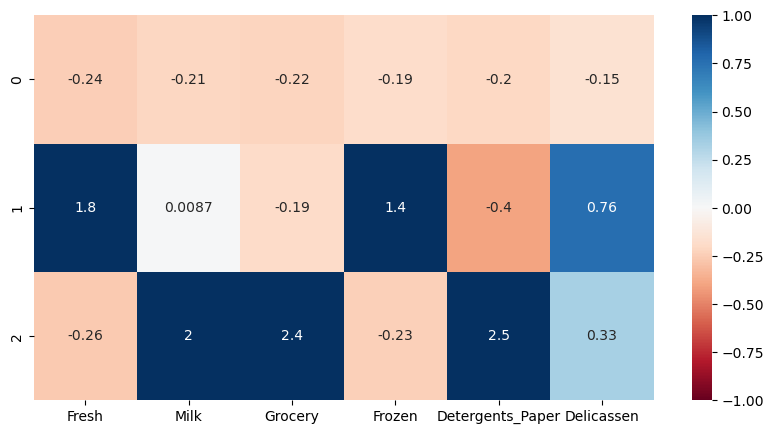

In [269]:
#Visualize cluster centers of 3 clusters with a heatmap

plt.figure(figsize=(10, 5))
sns.heatmap(cluster_centers3, vmin=-1, vmax=1, annot=True, cmap = "RdBu");

Name the Clusters:

* Cluster 0: **Low-volume buyers**
* Cluster 1: **Food-service-oriented buyers**
* Cluster 2: **High-volume buyers**

In [270]:
pd.Series(kmeans3.labels_).value_counts()

0    350
1     53
2     37
Name: count, dtype: int64

## 4c. Hierarchical Clustering 

In [50]:
scaled_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


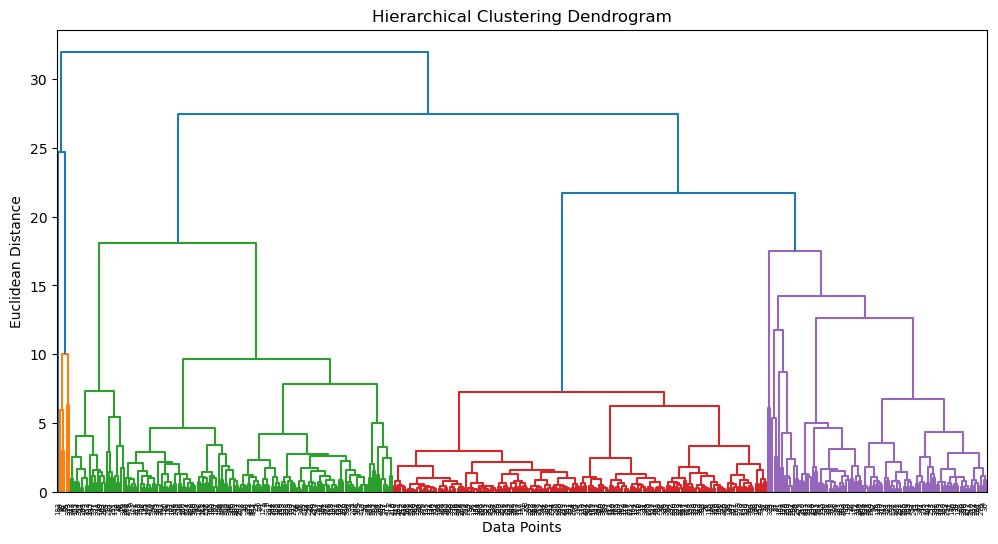

In [118]:
#Visualize the clusters with a dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram

plt.figure(figsize=(12, 6))

linkage_matrix = linkage(scaled_data, method='ward')
dendrogram_info = dendrogram(linkage_matrix, color_threshold=20)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance");

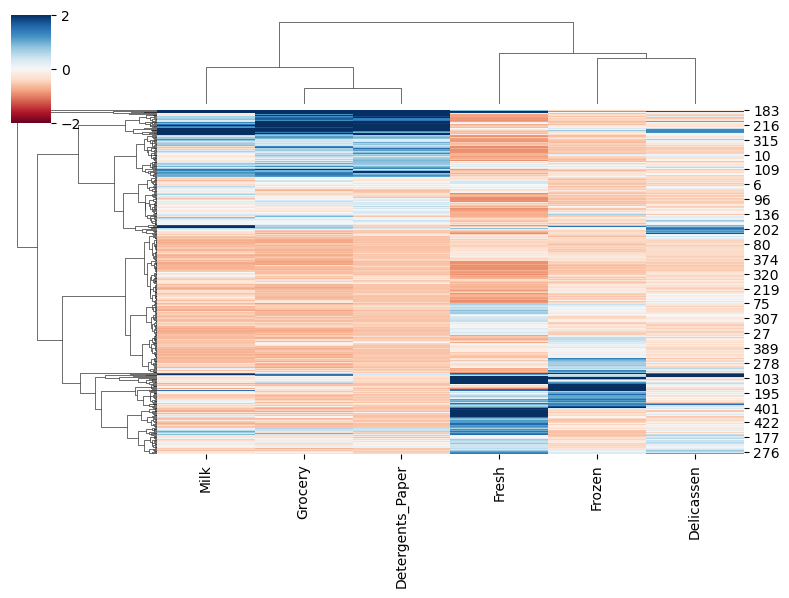

In [129]:
sns.clustermap(
    scaled_data, method="ward", cmap = "RdBu", figsize=(8,6), xticklabels = scaled_data.columns, vmin = -2, vmax = 2
);

In [122]:
#get the x-axis values from dendrogram (ivl = index variable list)
data_points = pd.Series(dendrogram_info['ivl'], name = "Data Point").astype("int")
data_points.head()

0    183
1     86
2     47
3     61
4     85
Name: Data Point, dtype: int64

In [123]:
from scipy.cluster.hierarchy import fcluster

den_clusters = pd.Series(fcluster(linkage_matrix,20,criterion="distance"), name = "Dendrogram Cluster")
den_clusters

0      3
1      3
2      3
3      4
4      5
      ..
435    5
436    5
437    3
438    4
439    4
Name: Dendrogram Cluster, Length: 440, dtype: int32

In [124]:
den_clusters_df = (
    den_clusters.reset_index().rename(columns = {"index": "Data Point"}).sort_values("Dendrogram Cluster")
)

In [134]:
den_clusters_df.head()

,Data Point,Dendrogram Cluster
47,47,1
61,61,1
85,85,1
86,86,1
333,333,1


In [130]:
den_clusters_df["Dendrogram Cluster"].value_counts().sort_index()

Dendrogram Cluster
1      5
2      1
3    153
4    177
5    104
Name: count, dtype: int64

Name the Clusters:

* Clusters 1 + 2: **High-volume buyers**
* Cluster 3: **Neighborhood retail-oriented buyers**
* Cluster 4: **Low-volume buyers**
* Cluster 5: **Food-service-oriented buyers**

In [297]:
# Verification -> Fit an Agglomerative Clustering Model with 5 clusters

from sklearn.cluster import AgglomerativeClustering

agg5 = AgglomerativeClustering(n_clusters=5)
agg5.fit(scaled_data)

#View cluster assignments

pd.Series(agg5.labels_).value_counts()

4    177
0    153
2    104
1      5
3      1
Name: count, dtype: int64

## 4d. Hierarchical Clustering for Preference Analysis (Row-wise Z-Score)

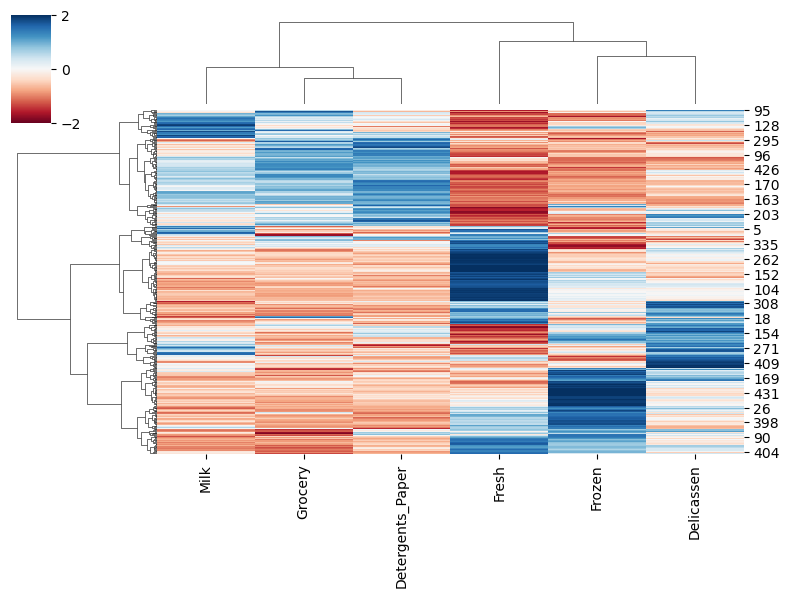

In [291]:
#Add z_score = 0 within the clustermap function and see what happens
sns.clustermap(
    scaled_data, method="ward", cmap = "RdBu", figsize=(8,6), xticklabels = scaled_data.columns, z_score=0,
    vmin =-2, vmax = 2
);

In [280]:
# update scaled dataframe so that each row has a mean of 0 and standard deviation of 1

# calculate mean and standard deviation for each row
row_means = scaled_data.mean(axis=1)
row_stds = scaled_data.std(axis=1)

# subtract row mean and divide by row standard deviation
data_zscore = scaled_data.sub(row_means, axis=0).div(row_stds, axis=0)

data_zscore.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.226470,1.554663,-0.038946,-1.586185,-0.045871,-0.110132
1,-1.285281,1.515302,0.395561,-0.922651,0.144427,0.152640
2,-0.838979,0.048198,-0.404631,-0.518050,-0.237279,1.950740
3,0.417555,-1.050725,-0.582252,1.607848,-0.796394,0.403969
4,0.846251,-0.619745,-0.664022,-0.248161,-0.914577,1.600254


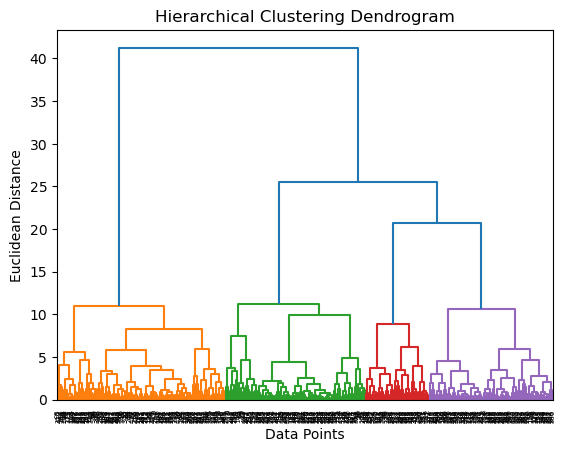

In [282]:
# update the dendrogram
linkage_matrix_zscore = linkage(data_zscore, method='ward')
dendrogram_info_zscore = dendrogram(linkage_matrix_zscore,color_threshold=15)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance");

In [283]:
#get the x-axis values from dendrogram_info_zscore (ivl = index variable list)
data_points_z_score = pd.Series(dendrogram_info_zscore['ivl'], name = "Data Point").astype("int")
data_points_z_score.head()

0     95
1    317
2    430
3    184
4    266
Name: Data Point, dtype: int64

In [284]:
from scipy.cluster.hierarchy import fcluster

den_clusters_z_score = pd.Series(fcluster(linkage_matrix_zscore,20,criterion="distance"), name = "Dendrogram Cluster")
den_clusters_z_score

0      2
1      1
2      3
3      4
4      2
      ..
435    4
436    2
437    1
438    2
439    1
Name: Dendrogram Cluster, Length: 440, dtype: int32

In [285]:
den_clusters_df_z_score = (
    den_clusters_z_score.reset_index().rename(columns = {"index": "Data Point"}).sort_values("Dendrogram Cluster")
)

In [287]:
den_clusters_df_z_score.head()

,Data Point,Dendrogram Cluster
439,439,1
304,304,1
303,303,1
302,302,1
301,301,1


In [288]:
den_clusters_df_z_score["Dendrogram Cluster"].value_counts().sort_index()

Dendrogram Cluster
1    149
2    125
3     56
4    110
Name: count, dtype: int64

Name the Clusters:

* Cluster 1: **Grocery-dominant spending profile**
* Cluster 2: **Fresh-dominant spending profile**
* Cluster 3: **Delicatessen-focused spending profile**
* Cluster 4: **Frozen-focused spending profile**

In [299]:
# Verification -> Fit an Agglomerative Clustering Model with 4 clusters on z score scaled data

from sklearn.cluster import AgglomerativeClustering

agg4 = AgglomerativeClustering(n_clusters=4)
agg4.fit(data_zscore)

#View cluster assignments

pd.Series(agg4.labels_).value_counts()

1    149
0    125
2    110
3     56
Name: count, dtype: int64

## 4e. DBScan Method

In [150]:
scaled_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [152]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [293]:
eps_range = np.arange(0.1,5,0.1)
min_samples_range = range(2,10,1)

results = []

# define a range of eps and min_samples values to loop through
for eps in eps_range:
    for min_samples in min_samples_range:
        
        dbscan = DBSCAN(eps = eps, min_samples= min_samples)
        dbscan.fit(scaled_data)
        
        labels = pd.Series(dbscan.labels_)
        
        # count the number of clusters (excluding noise points labeled as -1)
        n_clusters = len(set(labels.loc[labels != -1]))
        
        # count the number of noise points (labeled as -1)
        noise_points = len(labels.loc[labels == -1].values)
        
        # calculate the silhouette score
        if n_clusters>1:  # silhouette score requires at least 2 clusters
            sil_score = silhouette_score(scaled_data, labels, metric="euclidean", sample_size=None)
        else:
            sil_score = np.nan
        
        results.append([eps, min_samples, n_clusters, noise_points, sil_score])
    
dbscan_results = (
    pd.DataFrame(
        results, columns = ["Eps", "Min Samples", "Clusters", "Noise Points", "Silhouette Score"])
)

dbscan_results.head()

,Eps,Min Samples,Clusters,Noise Points,Silhouette Score
0,0.1,2,8,423,-0.393
1,0.1,3,1,437,NaN
2,0.1,4,0,440,NaN
3,0.1,5,0,440,NaN
4,0.1,6,0,440,NaN


In [294]:
#Top 5 Silhouette Scores with distinct combinations
(
    dbscan_results.sort_values("Silhouette Score", ascending=False)
    .groupby("Silhouette Score")
    .head(1)
    .head(5)
)

,Eps,Min Samples,Clusters,Noise Points,Silhouette Score
272,3.5,2,2,8,0.740284
224,2.9,2,2,10,0.582247
136,1.8,2,2,13,0.581583
122,1.6,4,2,24,0.578543
232,3.0,2,3,8,0.577890


In [295]:
#Use eps = 3.5 and min_samples = 2 as they produced the highest Silhouette Score of 0.740284
dbscan = DBSCAN(eps = 3.5, min_samples= 2)
dbscan.fit(scaled_data)

,eps,3.5
,min_samples,2
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [296]:
pd.Series(dbscan.labels_).value_counts()

 0    430
-1      8
 1      2
Name: count, dtype: int64

## 5. Compare Techniques

For each of the following 5 models, fit the model on the scaled data, note down the number of data points in each cluster and record the silhouette score:
1. K-Means with 3 clusters
2. K-Means with 5 clusters
3. Hiearchical Clustering with 5 clusters
4. Hierarchical Clustering with 4 clusters
5. DBSCAN with 2 clusters

In [319]:
def print_metrics(model, data):
    print(model)
    print(Counter(map(int, model.labels_)))
    print(silhouette_score(data, model.labels_))

In [320]:
print_metrics(kmeans3, scaled_data)

KMeans(n_clusters=3, random_state=42)
Counter({0: 350, 1: 53, 2: 37})
0.4582633767207058


In [321]:
print_metrics(kmeans5, scaled_data)

KMeans(n_clusters=5, random_state=42)
Counter({3: 272, 0: 96, 1: 59, 2: 11, 4: 2})
0.36890127429678055


In [322]:
print_metrics(agg5, scaled_data)

AgglomerativeClustering(n_clusters=5)
Counter({4: 177, 0: 153, 2: 104, 1: 5, 3: 1})
0.23988371669170097


In [323]:
print_metrics(agg4, scaled_data)

AgglomerativeClustering(n_clusters=4)
Counter({1: 149, 0: 125, 2: 110, 3: 56})
0.1309048157578048


In [324]:
print_metrics(dbscan, scaled_data)

DBSCAN(eps=3.5, min_samples=2)
Counter({0: 430, -1: 8, 1: 2})
0.740283564230615


## 6. Predict the Cluster of a New Client Using the Best Model

In [192]:
# Given this new client, determine which cluster they fall into

new_client = pd.DataFrame([np.array([15000, 15000, 30000, 500, 15000, 2000])],
                          columns=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])
new_client

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,15000,15000,30000,500,15000,2000


In [197]:
# Function to standardize the new client data

def prep_client_data(new_client):
    
    scaled_new_client = pd.DataFrame(scaler.transform(new_client), columns = scaled_data.columns)
    
    return scaled_new_client

In [198]:
prep_client_data(new_client)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.237451,1.248474,2.322787,-0.530388,2.544604,0.168671


Use the 5 Clusters from K-Means model:

* Cluster 0: **Neighborhood retail-oriented buyers**
* Cluster 1: **Food-service-oriented buyers**
* Cluster 2: **High-volume buyers**
* Cluster 3: **Low-volume buyers**
* Cluster 4: **Premium food-service buyers**

In [223]:
#Make a prediction using the K-Means model with 5 clusters since this is the best model

kmeans5.predict(prep_client_data(new_client))

array([0], dtype=int32)

New client belong to **Cluster 0**